# Bio-indicators of climate

## Extraction of the 5 species

First of all, we identify the 5 id_pasa.

In [1]:
from stations import *
from species import *
from visualization import *

plt_id_cfvvf_list = [2707, 2708, 2709, 2710, 2711, 2714, 2715, 2718, 2719, 2720,
                 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2731, 2732,
                 2735, 2736, 2737, 2738, 2739, 2840, 2844, 2845, 2847, 2848,
                 2850, 2852, 2854, 2855, 2856, 2857, 2860, 2861, 3611, 3613,
                 3615, 3616, 3617, 3618, 3620, 3621, 3626, 3628, 3629, 3631,
                 3632, 3633, 3634, 3636, 3638, 9027, 9030, 9031, 9032, 9033,
                 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9042, 9043, 9044,
                 9045, 9046, 9047]
pasa_var_clim = pd.read_csv('pasa_var_clim_distinct_examples.csv', sep=",", on_bad_lines='skip')
id_pasas = np.unique(pasa_var_clim['id_pasa'])
print(id_pasas)

[   1 2324 4729 4882 7330]


In [2]:
fir = Species(id_pasa=7330)
print(fir)
oak = Species(id_pasa=2324)
print(oak)
acanthus = Species(id_pasa=1)
print(acanthus)
dwarf_willow = Species(id_pasa=4729)
print(dwarf_willow)
velvet_bell = Species(id_pasa=4882)
print(velvet_bell)

| Name: ABIES ALBA MILL.    
| ID (pasa): 7330
| ID (cfvvf): 9027
| Number of samples: 6148
| Name: QUERCUS ILEX L.     
| ID (pasa): 2324
| ID (cfvvf): 2847
| Number of samples: 5136
| Name: ACANTHUS MOLLIS L.  
| ID (pasa): 1
| ID (cfvvf): 3
| Number of samples: 36
| Name: SALIX HERBACEA L.   
| ID (pasa): 4729
| ID (cfvvf): 5694
| Number of samples: 402
| Name: BARTSCHIA ALPINA L. 
| ID (pasa): 4882
| ID (cfvvf): 5872
| Number of samples: 484


ACANTHUS MOLLIS = bear's breech, acanthe molle

QUERCUS ILEX = holm oak, chêne vert

SALIX HERBACEA = dwarf willow, saule herbacé

BARTSCHIA ALPINA = velvet bell, bartsie des Alpes

ABIES ALBA = silver fir, sapin blanc

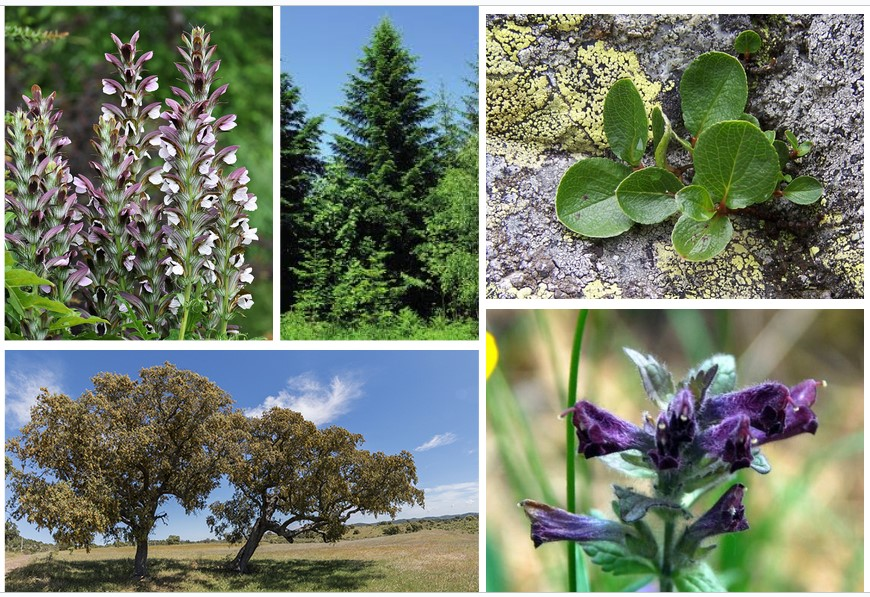

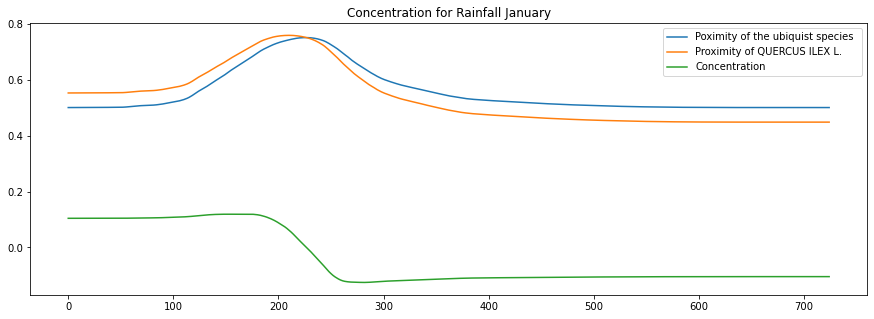

In [3]:
Visualization.plot_concentration(oak, 'rr01_61_90')

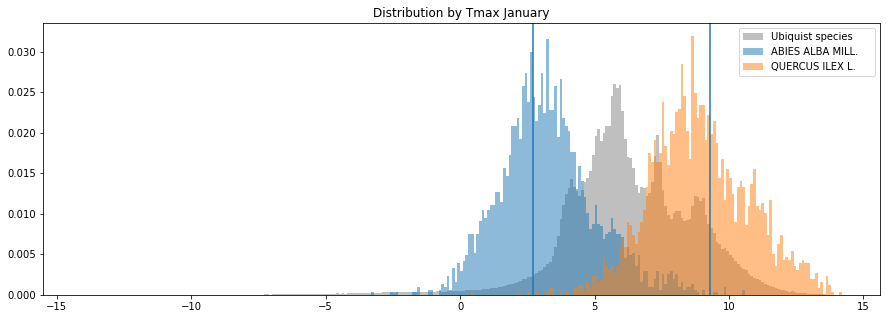

In [4]:
Visualization.plot_hist([fir, oak], 'tx01_61_90')

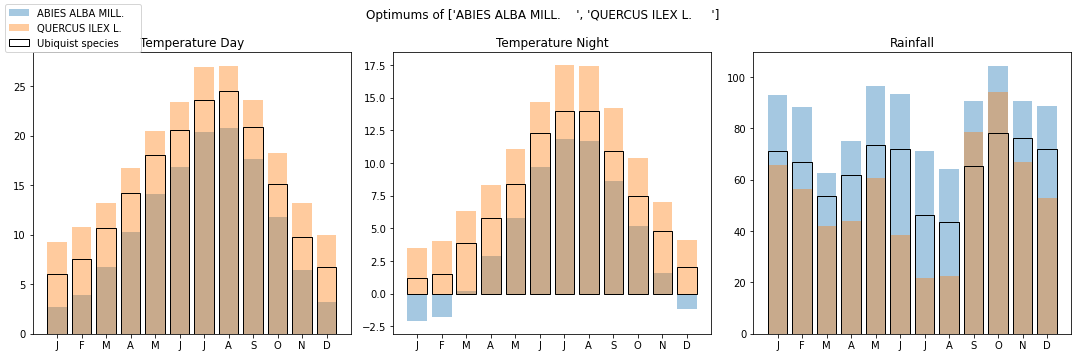

In [5]:
Visualization.plot_summary([fir, oak])

## GLM

In [6]:
test_species = fir
model = My_GLM()

In [7]:
grid = pd.read_csv('../Grid/final.csv', sep=",")

In [8]:
grid_columns = ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12',
           'Tmax_01_cu', 'Tmax_02_cu', 'Tmax_03_cu', 'Tmax_04_cu', 'Tmax_05_cu', 'Tmax_06_cu',
           'Tmax_07_cu', 'Tmax_08_cu', 'Tmax_09_cu', 'Tmax_10_cu', 'Tmax_11_cu', 'Tmax_12_cu',
           'Tmin_01_cu', 'Tmin_02_cu', 'Tmin_03_cu', 'Tmin_04_cu', 'Tmin_05_cu', 'Tmin_06_cu',
           'Tmin_07_cu', 'Tmin_08_cu', 'Tmin_09_cu', 'Tmin_10_cu', 'Tmin_11_cu', 'Tmin_12_cu']
columns = ['rr01_61_90', 'rr02_61_90', 'rr03_61_90', 'rr04_61_90', 'rr05_61_90', 'rr06_61_90',
           'rr07_61_90', 'rr08_61_90', 'rr09_61_90', 'rr10_61_90', 'rr11_61_90', 'rr12_61_90',
           'tx01_61_90', 'tx02_61_90', 'tx03_61_90', 'tx04_61_90', 'tx05_61_90', 'tx06_61_90',
           'tx07_61_90', 'tx08_61_90', 'tx09_61_90', 'tx10_61_90', 'tx11_61_90', 'tx12_61_90',
           'tn01_61_90', 'tn02_61_90', 'tn03_61_90', 'tn04_61_90', 'tn05_61_90', 'tn06_61_90', 
           'tn07_61_90', 'tn08_61_90', 'tn09_61_90', 'tn10_61_90', 'tn11_61_90', 'tn12_61_90']
res = np.zeros(len(grid))
for grid_column, column in zip(grid_columns, columns) :
    bin_edges =  test_species.variables[column].bin_edges
    prox = test_species.variables[column].proximities
    indices = np.digitize(grid[grid_column].values, bin_edges)
    values = prox[list(indices-2)]
    res += values / 36

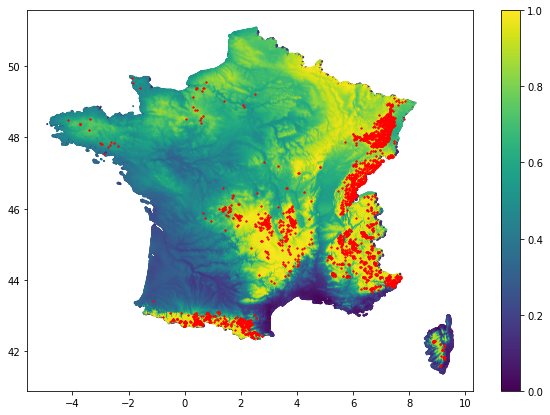

In [9]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.scatter(grid['lon'], grid['lat'], c=res, s=1)
plt.scatter(test_species.locations['lon'], test_species.locations['lat'], c='red', s=1)
plt.colorbar()
plt.show()

## Meeting 04/02

Emmanuel : production résultats architecture (taille ? PostGRESQL)
/ Travail sur des données raster en entrée : map.tif au lieu de climate_fr, filtrage préalable sur l'emprise d'un ensemble d'espèces

données de l'IFN données FORET

### Divers

Béatrice Cointe Recherche Action Forêt

27 28 aout

30 sept 1 oct

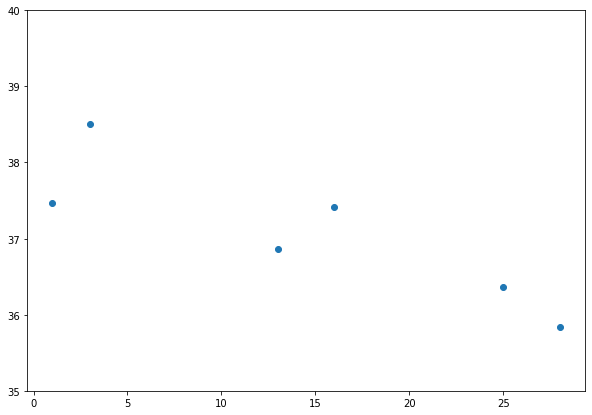

In [10]:
x = [1, 3, 13, 16, 25, 28]
y = [37 + 28/60, 38.5, 36 + 52/60, 37 + 25/60, 36 + 22/60, 35 + 50/60]
plt.scatter(x, y)
plt.ylim((35, 40))
plt.show()